In [ ]:
import pandas as pd
import re

# Step 1: Load your data
df = pd.read_csv('/content/city_hub_distances UPDATED - city_hub_distances.csv')  # or use pd.read_excel / pd.read_table etc.

# Step 2: Define a function to convert duration to minutes
def duration_to_minutes(duration_str):
    if not isinstance(duration_str, str):
        return 0  # Or handle as appropriate, e.g., return pd.NA

    days = hours = mins = 0
    if 'day' in duration_str:
        match = re.search(r'(\d+)\s*day', duration_str)
        days = int(match.group(1)) if match else 0
    if 'hour' in duration_str:
        match = re.search(r'(\d+)\s*hour', duration_str)
        hours = int(match.group(1)) if match else 0
    if 'min' in duration_str:
        match = re.search(r'(\d+)\s*min', duration_str)
        mins = int(match.group(1)) if match else 0
    return days * 24 * 60 + hours * 60 + mins

# Step 3: Apply to your dataframe
df['DurationMinutes'] = df['Duration'].apply(duration_to_minutes)

# Step 4: For each city, find the hub with the minimum duration
nearest_hub_df = df.loc[df.groupby('City')['DurationMinutes'].idxmin()][['City', 'Hub']]

# Rename for clarity
nearest_hub_df = nearest_hub_df.rename(columns={'Hub': 'NearestHub'})

# Step 5: Save or inspect the result
print(nearest_hub_df.head())
# nearest_hub_df.to_csv('nearest_hubs.csv', index=False)

           City NearestHub
36     AGARTALA   AGARTALA
81         AGRA       AGRA
86    AHMEDABAD  AHMEDABAD
147  AHMEDNAGAR       PUNE
208      AIZWAL   AGARTALA


In [ ]:
nearest_hub_df.head(30)

,City,NearestHub
36,AGARTALA,AGARTALA
81,AGRA,AGRA
86,AHMEDABAD,AHMEDABAD
147,AHMEDNAGAR,PUNE
208,AIZWAL,AGARTALA
234,AJMER,JAIPUR
278,AKOLA,NAGPUR
339,ALIGARH,AGRA
355,ALIPURDWAR,SILIGURI
419,ALLAHABAD,VARANASI


In [ ]:
nearest_hub_df['City'].unique()

array(['AGARTALA', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AIZWAL', 'AJMER',
       'AKOLA', 'ALIGARH', 'ALIPURDWAR', 'ALLAHABAD', 'ALLEPPEY', 'ALWAR',
       'ALWAYE', 'AMARAVATI', 'AMBALA', 'AMBIKAPUR(CG)', 'AMETHI',
       'AMRITSAR', 'ANAND', 'ANANTHPUR', 'ANGUL', 'ANKLESHWAR', 'ASANSOL',
       'AURANGABAD MH', 'BADDI', 'BAGALKOT', 'BAHADURGARH', 'BAHARAMPORE',
       'BALASORE', 'BALLABGARH', 'BANGALORE', 'BANKRA', 'BANKURA',
       'BARABANKI', 'BARAMATI', 'BARASAT', 'BAREILLY', 'BARODA', 'BASTI',
       'BAWAL', 'BEGUSARI', 'BEHROR', 'BELGAUM', 'BELLARY',
       'BERHAMPUR -OR', 'BETUL', 'BHADRAK', 'BHAGALPUR', 'BHARATPUR',
       'BHATINDA', 'BHAVNAGAR', 'BHILAI', 'BHILWARA', 'BHIMAVARAM',
       'BHIWADI', 'BHIWANDI', 'BHOPAL', 'BHUBANESHWAR', 'BHUJ', 'BIDAR',
       'BIJAPUR', 'BIJNOR', 'BIKANER', 'BILASPUR', 'BILASPUR ( H.P.)',
       'BIRBHUM', 'BOKARO', 'BOLANGIR', 'BONGAIGON', 'BULANDSHAHAR',
       'BURDWAN', 'CALICUT', 'CANNANORE', 'CHANDIGARH', 'CHANDRAPUR -MH',
       'C

In [ ]:
# prompt: check which hub is nearest to Dahej city

# Define the target city
target_city = 'DAHEJ'

# Filter the dataframe for the target city
dahej_data = df[df['City'] == target_city]

# Check if the target city exists in the data
if not dahej_data.empty:
    # Find the row with the minimum duration for Dahej
    nearest_hub_row = dahej_data.loc[dahej_data['DurationMinutes'].idxmin()]

    # Get the nearest hub
    nearest_hub = nearest_hub_row['Hub']

    print(f"The nearest hub to {target_city} is: {nearest_hub}")
else:
    print(f"Data for '{target_city}' not found in the DataFrame.")

The nearest hub to DAHEJ is: BARODA


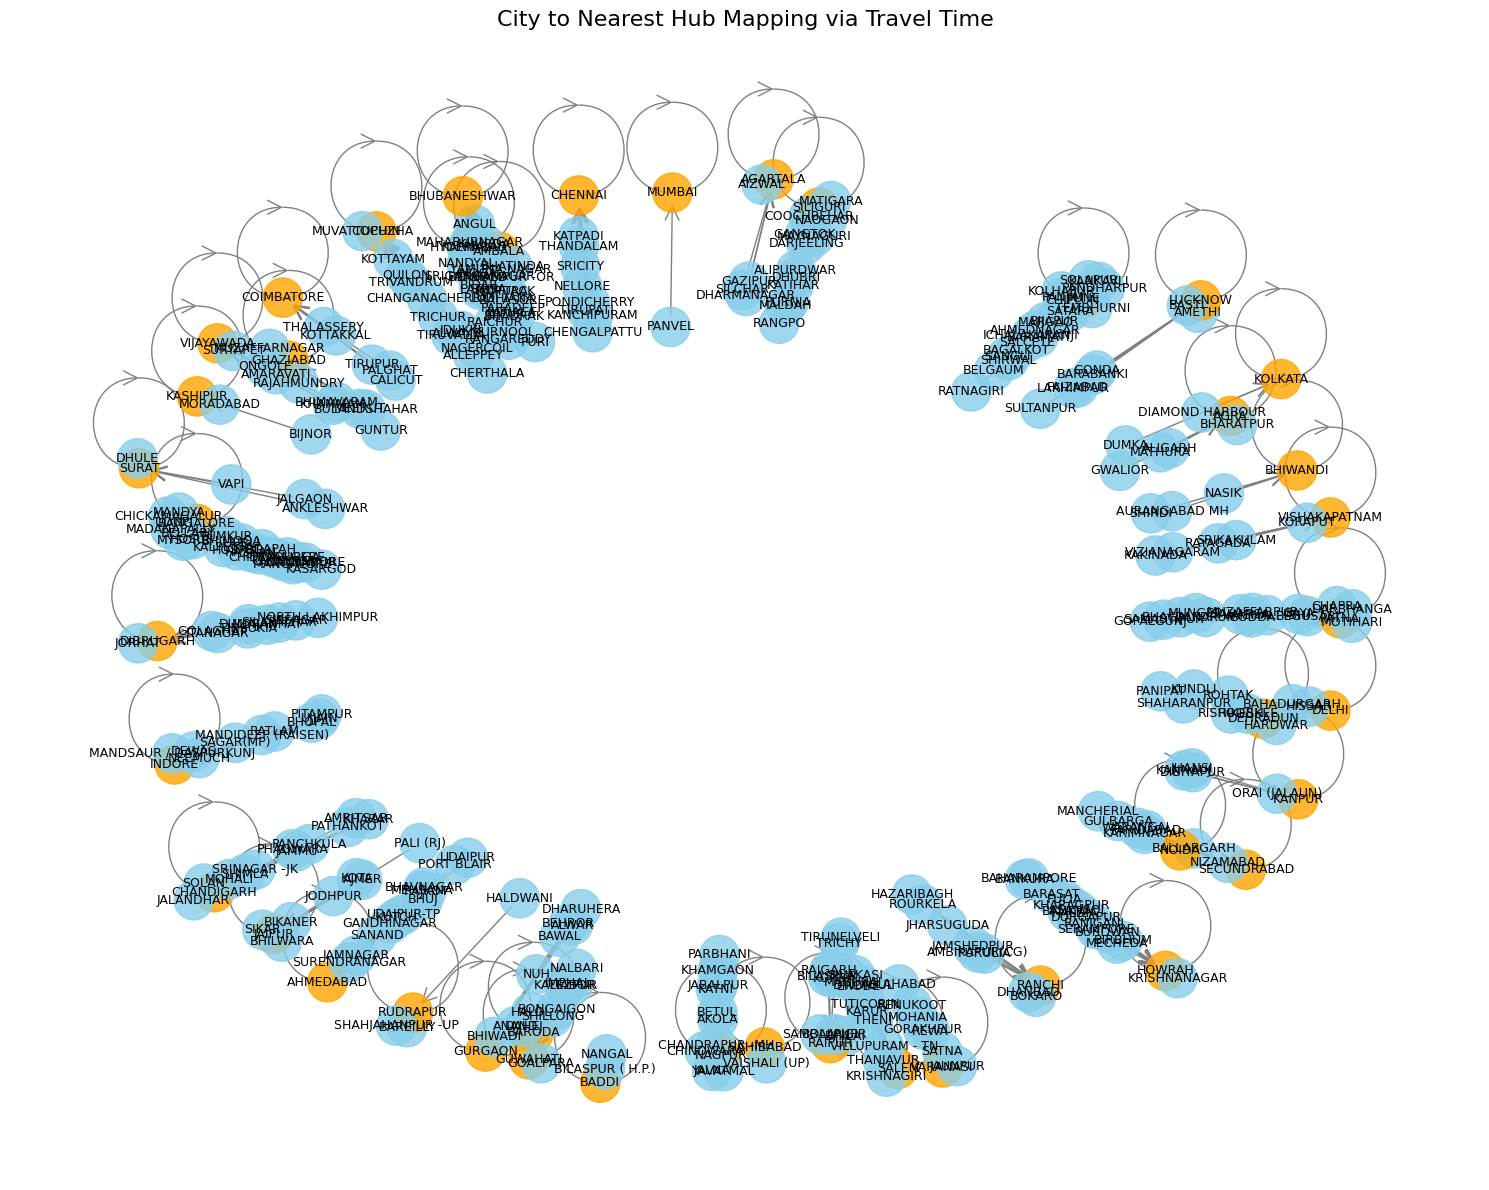

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the mapping (from your output)
df = nearest_hub_df

# Optional: Load hub cities list to color nodes
hub_cities = set(df[df['City'] == df['NearestHub']]['City'].tolist())

# Initialize a directed graph
G = nx.DiGraph()

# Add edges (only where mapped hub is valid)
for _, row in df.iterrows():
    city = row['City']
    hub = row['NearestHub']
    if pd.notna(hub):
        G.add_edge(city, hub)

# Node colors
color_map = []
for node in G.nodes():
    if node in hub_cities:
        color_map.append('orange')  # Hubs
    else:
        color_map.append('skyblue')  # Branches

# Position layout
pos = nx.spring_layout(G, seed=42)  # You can try shell_layout or circular_layout too

# Draw the graph
plt.figure(figsize=(15, 12))
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=800, alpha=0.8)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=25, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

plt.title("City to Nearest Hub Mapping via Travel Time", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
nearest_hub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 36 to 15070
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        351 non-null    object
 1   NearestHub  351 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [ ]:
distance_df


NameError: name 'distance_df' is not defined

In [ ]:
import pandas as pd

# Load data
city_hub_df = nearest_hub_df  # Columns: 'City', 'Mapped_Hub'
distance_df = pd.read_csv('/content/city_distances_google.csv')  # Columns: 'origin', 'destination', 'duration_hr'
airport_cities_df = pd.read_csv('/content/airport_city_name.csv')  # Columns: 'Unique_Origin_Cities', 'Unique_Destination_Cities'

# Normalize to uppercase
city_hub_df['City'] = city_hub_df['City'].str.upper()
city_hub_df['NearestHub'] = city_hub_df['NearestHub'].str.upper()
distance_df['origin'] = distance_df['origin'].str.upper()
distance_df['destination'] = distance_df['destination'].str.upper()
airport_origin = airport_cities_df['Unique_Origin_Cities'].dropna().str.upper()
airport_dest = airport_cities_df['Unique_Destination_Cities'].dropna().str.upper()

# Combine origin and destination airport cities
airport_cities = set(airport_origin).union(set(airport_dest))

# Find non-airport hubs
unique_hubs = city_hub_df['NearestHub'].dropna().unique()
non_airport_hubs = [hub for hub in unique_hubs if hub not in airport_cities]

# Map non-airport hubs to nearest airport cities
hub_to_airport = {}
for hub in non_airport_hubs:
    options = distance_df[
        (distance_df['origin'] == hub) &
        (distance_df['destination'].isin(airport_cities))
    ]
    options = options.dropna(subset=['duration_hr'])
    if not options.empty:
        nearest_airport = options.loc[options['duration_hr'].idxmin(), 'destination']
        hub_to_airport[hub] = nearest_airport
    else:
        hub_to_airport[hub] = None

# Function to determine airport city
def get_airport_city(hub):
    if pd.isna(hub):
        return None
    hub = hub.upper()
    return hub if hub in airport_cities else hub_to_airport.get(hub, None)

# Add airport city column
city_hub_df['Final_Airport_City'] = city_hub_df['NearestHub'].apply(get_airport_city)

# # Save final mapping
# city_hub_df.to_csv('city_to_hub_to_airport_mapping.csv', index=False)

# Preview
city_hub_df.head(20)

,City,NearestHub,Final_Airport_City
36,AGARTALA,AGARTALA,AGARTALA
81,AGRA,AGRA,AGRA
86,AHMEDABAD,AHMEDABAD,AHMEDABAD
147,AHMEDNAGAR,PUNE,PUNE
208,AIZWAL,AGARTALA,AGARTALA
234,AJMER,JAIPUR,JAIPUR
278,AKOLA,NAGPUR,NAGPUR
339,ALIGARH,AGRA,AGRA
355,ALIPURDWAR,SILIGURI,SILIGURI
419,ALLAHABAD,VARANASI,VARANASI


In [ ]:
# prompt: convert the column name NearestHub to Mapped_Hub in city_hub_df

city_hub_df = city_hub_df.rename(columns={'NearestHub': 'Mapped_Hub'})

In [ ]:
city_hub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 36 to 15070
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City                351 non-null    object
 1   Mapped_Hub          351 non-null    object
 2   Final_Airport_City  351 non-null    object
dtypes: object(3)
memory usage: 11.0+ KB


In [ ]:
city_hub_df.head(40)

,City,Mapped_Hub,Final_Airport_City
36,AGARTALA,AGARTALA,AGARTALA
81,AGRA,AGRA,AGRA
86,AHMEDABAD,AHMEDABAD,AHMEDABAD
147,AHMEDNAGAR,PUNE,PUNE
208,AIZWAL,AGARTALA,AGARTALA
234,AJMER,JAIPUR,JAIPUR
278,AKOLA,NAGPUR,NAGPUR
339,ALIGARH,AGRA,AGRA
355,ALIPURDWAR,SILIGURI,SILIGURI
419,ALLAHABAD,VARANASI,VARANASI


In [ ]:
# prompt: drop city column from city_hub_df

city_hub_df = city_hub_df.drop('City', axis=1)

In [ ]:
city_hub_df.head(40)

,Mapped_Hub,Final_Airport_City
36,AGARTALA,AGARTALA
81,AGRA,AGRA
86,AHMEDABAD,AHMEDABAD
147,PUNE,PUNE
208,AGARTALA,AGARTALA
234,JAIPUR,JAIPUR
278,NAGPUR,NAGPUR
339,AGRA,AGRA
355,SILIGURI,SILIGURI
419,VARANASI,VARANASI


In [ ]:
city_hub_df.to_csv('city_to_hub_to_airport_mapping.csv', index=False)

In [ ]:
import pandas as pd

# Load files
shipments_df = pd.read_csv('/content/dataset2_with_charged_weight.csv')
city_airport_df = city_hub_df
flight_df = pd.read_csv("/content/airport_connection_with_city_name.csv")

# Standardize to uppercase
shipments_df["Origin City"] = shipments_df["Origin City"].str.upper()
shipments_df["Destination City"] = shipments_df["Destination City"].str.upper()
city_airport_df["City"] = city_airport_df["City"].str.upper()
city_airport_df["Mapped_Hub"] = city_airport_df["Mapped_Hub"].str.upper()
city_airport_df["Final_Airport_City"] = city_airport_df["Final_Airport_City"].str.upper()
flight_df["origin_city"] = flight_df["origin_city"].str.upper()
flight_df["destination_city"] = flight_df["destination_city"].str.upper()

# Build mappings
city_to_hub = dict(zip(city_airport_df["City"], city_airport_df["Mapped_Hub"]))
hub_to_airport = dict(zip(city_airport_df["Mapped_Hub"], city_airport_df["Final_Airport_City"]))
city_to_airport = dict(zip(city_airport_df["City"], city_airport_df["Final_Airport_City"]))

# Function to map city to airport city
def map_to_airport_city(city):
    if city in city_to_airport and pd.notna(city_to_airport[city]):
        return city_to_airport[city]
    hub = city_to_hub.get(city)
    if hub and hub in hub_to_airport:
        return hub_to_airport[hub]
    return None

# Apply mapping
shipments_df["Origin Hub City"] = shipments_df["Origin City"].apply(lambda x: city_to_hub.get(x, x))
shipments_df["Origin Airport City"] = shipments_df["Origin City"].apply(map_to_airport_city)
shipments_df["Destination Hub City"] = shipments_df["Destination City"].apply(lambda x: city_to_hub.get(x, x))
shipments_df["Destination Airport City"] = shipments_df["Destination City"].apply(map_to_airport_city)

# Build flight route set using airport *cities*, not codes
valid_routes = set(zip(flight_df["origin_city"], flight_df["destination_city"]))

# Final check for availability
def check_flight_availability(row):
    oac = row["Origin Airport City"]
    dac = row["Destination Airport City"]
    if pd.notna(oac) and pd.notna(dac) and (oac, dac) in valid_routes:
        return "Yes"
    return "No"

# Apply check
shipments_df["Flight Available (Updated)"] = shipments_df.apply(check_flight_availability, axis=1)

# Save result
shipments_df.to_csv("shipment_updated.csv", index=False)

# Debug sample: where flight exists
print(shipments_df[shipments_df["Flight Available (Updated)"] == "Yes"].head())

   Org Region Origin City Dlv Region Destination City Aeroplane category  \
50        AMD   AHMEDABAD        BBI            ANGUL            EXPRESS   
51        AMD   AHMEDABAD        BBI            ANGUL                GCR   
52        AMD   AHMEDABAD        BBI            ANGUL              PRIME   
53        AMD   AHMEDABAD        BBI         BALASORE            EXPRESS   
54        AMD   AHMEDABAD        BBI         BALASORE                GCR   

   Flight Available   Weight  Conno  ChargedWeight Origin Hub City  \
50               No    0.300    3.0            NaN       AHMEDABAD   
51               No  122.957   61.0            NaN       AHMEDABAD   
52               No   51.402    8.0            NaN       AHMEDABAD   
53               No    0.400    2.0            NaN       AHMEDABAD   
54               No  255.899  109.0            NaN       AHMEDABAD   

   Origin Airport City Destination Hub City Destination Airport City  \
50           AHMEDABAD         BHUBANESHWAR       

In [ ]:
shipments_df.head(20)

,Org Region,Origin City,Dlv Region,Destination City,Aeroplane category,Flight Available,Weight,Conno,ChargedWeight,Origin Hub City,Origin Airport City,Destination Hub City,Destination Airport City,Flight Available (Updated)
0,AMD,AHMEDABAD,AMD,AHMEDABAD,EXPRESS,No,173.918,238.0,NaN,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,No
1,AMD,AHMEDABAD,AMD,AHMEDABAD,GCR,No,1396.925,6419.0,NaN,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,No
2,AMD,AHMEDABAD,AMD,AHMEDABAD,PRIME,No,1597.815,291.0,NaN,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,No
3,AMD,AHMEDABAD,AMD,ANAND,EXPRESS,No,2.660,25.0,NaN,AHMEDABAD,AHMEDABAD,BARODA,BARODA,No
4,AMD,AHMEDABAD,AMD,ANAND,GCR,No,107.803,358.0,NaN,AHMEDABAD,AHMEDABAD,BARODA,BARODA,No
5,AMD,AHMEDABAD,AMD,ANAND,PRIME,No,180.494,38.0,NaN,AHMEDABAD,AHMEDABAD,BARODA,BARODA,No
6,AMD,AHMEDABAD,AMD,ANKLESHWAR,EXPRESS,No,0.940,7.0,NaN,AHMEDABAD,AHMEDABAD,SURAT,SURAT,No
7,AMD,AHMEDABAD,AMD,ANKLESHWAR,GCR,No,85.181,433.0,NaN,AHMEDABAD,AHMEDABAD,SURAT,SURAT,No
8,AMD,AHMEDABAD,AMD,ANKLESHWAR,PRIME,No,47.163,34.0,NaN,AHMEDABAD,AHMEDABAD,SURAT,SURAT,No
9,AMD,AHMEDABAD,AMD,BARODA,EXPRESS,No,20.510,120.0,NaN,AHMEDABAD,AHMEDABAD,BARODA,BARODA,No


In [ ]:
desired_order = [
    'Org Region',
    'Origin City',
    'Origin Hub City',
    'Origin Airport City',
    'Dlv Region',
    'Destination Airport City',
    'Destination Hub City',
    'Destination City',
    'Aeroplane category',
    'Flight Available',
    'Weight',
    'Conno',
    'ChargedWeight',
    'Flight Available (Updated)'
]

shipments_df = shipments_df[desired_order]

In [ ]:
shipments_df.head(20)

,Org Region,Origin City,Origin Hub City,Origin Airport City,Dlv Region,Destination Airport City,Destination Hub City,Destination City,Aeroplane category,Flight Available,Weight,Conno,ChargedWeight,Flight Available (Updated)
0,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,EXPRESS,No,173.918,238.0,NaN,No
1,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,GCR,No,1396.925,6419.0,NaN,No
2,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,PRIME,No,1597.815,291.0,NaN,No
3,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,ANAND,EXPRESS,No,2.660,25.0,NaN,No
4,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,ANAND,GCR,No,107.803,358.0,NaN,No
5,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,ANAND,PRIME,No,180.494,38.0,NaN,No
6,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,SURAT,SURAT,ANKLESHWAR,EXPRESS,No,0.940,7.0,NaN,No
7,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,SURAT,SURAT,ANKLESHWAR,GCR,No,85.181,433.0,NaN,No
8,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,SURAT,SURAT,ANKLESHWAR,PRIME,No,47.163,34.0,NaN,No
9,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,BARODA,EXPRESS,No,20.510,120.0,NaN,No


In [ ]:
# prompt: number of Yes and No in the flight available updated column

# Check the count of 'Yes' and 'No' in the 'Flight Available (Updated)' column
flight_available_counts = shipments_df['Flight Available (Updated)'].value_counts()

print("Counts of 'Yes' and 'No' in 'Flight Available (Updated)':")
flight_available_counts


Counts of 'Yes' and 'No' in 'Flight Available (Updated)':


,count
Flight Available (Updated),
Yes,87442
No,51529


In [ ]:
# prompt: make a seperate dataframe having Origin City	Origin Hub City	Origin Airport City	Destination Airport City	Destination Hub City	Destination City	Aeroplane category  Weight	 ChargedWeight	Flight Available (Updated)

# Create a new dataframe with the specified columns
shipments_subset_df = shipments_df[[
    'Origin City',
    'Origin Hub City',
    'Origin Airport City',
    'Destination Airport City',
    'Destination Hub City',
    'Destination City',
    'Aeroplane category',
    'Weight',
    'ChargedWeight',
    'Flight Available (Updated)'
]].copy()

# Display the first few rows of the new dataframe
shipments_subset_df.head(20)

,Origin City,Origin Hub City,Origin Airport City,Destination Airport City,Destination Hub City,Destination City,Aeroplane category,Weight,ChargedWeight,Flight Available (Updated)
0,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,EXPRESS,173.918,NaN,No
1,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,GCR,1396.925,NaN,No
2,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,PRIME,1597.815,NaN,No
3,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,ANAND,EXPRESS,2.660,NaN,No
4,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,ANAND,GCR,107.803,NaN,No
5,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,ANAND,PRIME,180.494,NaN,No
6,AHMEDABAD,AHMEDABAD,AHMEDABAD,SURAT,SURAT,ANKLESHWAR,EXPRESS,0.940,NaN,No
7,AHMEDABAD,AHMEDABAD,AHMEDABAD,SURAT,SURAT,ANKLESHWAR,GCR,85.181,NaN,No
8,AHMEDABAD,AHMEDABAD,AHMEDABAD,SURAT,SURAT,ANKLESHWAR,PRIME,47.163,NaN,No
9,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,BARODA,EXPRESS,20.510,NaN,No


In [ ]:
shipments_subset_df.to_csv("shipment_subset.csv", index=False)
print("\nSubset data saved to 'shipment_subset.csv'")


Subset data saved to 'shipment_subset.csv'


In [ ]:
import pandas as pd

# Load your data
df = shipments_df  # Replace with actual file

def build_flow(row):
    # Build initial list of cities based on whether flight is available
    if row["Flight Available (Updated)"] == "Yes":
        path = [
            row["Origin City"],
            row["Origin Hub City"],
            row["Origin Airport City"],
            row["Destination Airport City"],
            row["Destination Hub City"],
            row["Destination City"]
        ]
    else:
        path = [
            row["Origin City"],
            row["Origin Hub City"],
            row["Destination Hub City"],
            row["Destination City"]
        ]

    # Convert all elements to string and handle potential None/NaN values
    processed_path = [str(item) if pd.notna(item) else "" for item in path]

    # Remove consecutive duplicates, handling empty strings appropriately
    simplified_path = []
    if processed_path: # Ensure path is not empty
        simplified_path.append(processed_path[0])
        for city in processed_path[1:]:
            # Append if the current city is not the same as the last added city
            if city != simplified_path[-1]:
                simplified_path.append(city)

    # Remove empty strings from the simplified path before joining
    final_path = [city for city in simplified_path if city != ""]

    # Build flow with correct symbols
    flow_elements = []
    if final_path:
        flow_elements.append(final_path[0])
        for i in range(1, len(final_path)):
            prev_city = final_path[i - 1]
            curr_city = final_path[i]

            # Check if the transition is between the origin and destination airport cities in a flight path
            is_flight_transition = False
            if row["Flight Available (Updated)"] == "Yes" and \
               prev_city == str(row["Origin Airport City"]) and \
               curr_city == str(row["Destination Airport City"]):
                is_flight_transition = True

            symbol = "✈️" if is_flight_transition else "🛣️"

            flow_elements.append(symbol)
            flow_elements.append(curr_city)

    return " ".join(flow_elements) if flow_elements else ""


# Apply to DataFrame
df["City Flow"] = df.apply(build_flow, axis=1)

# Save result
output_cols = ["Origin City", "Destination City", "Flight Available (Updated)", "City Flow"]
output_cols_exist = [col for col in output_cols if col in df.columns]
df[output_cols_exist].to_csv("city_flow_paths.csv", index=False)

print("✅ Done. Distinct city flow with correct symbols saved to 'city_flow_paths.csv'.")

✅ Done. Distinct city flow with correct symbols saved to 'city_flow_paths.csv'.


In [ ]:
# prompt: perpare a new dataframe containing origin city, destination city, flight available, city flow

# Prepare the final output dataframe
# Select the relevant columns from the enriched shipments_df
output_df = shipments_df[[
    "Origin City",
    "Destination City",
    "Aeroplane category",
    "Flight Available (Updated)",
    "City Flow"
]].copy() # Use .copy() to avoid SettingWithCopyWarning

# Rename the 'Flight Available (Updated)' column to 'Flight available'
output_df.rename(columns={"Flight Available (Updated)": "Flight available"}, inplace=True)

# Display the first few rows of the final dataframe
print("Final DataFrame prepared:")
print(output_df.head())


# Save the final dataframe to a CSV file
# output_df.to_csv("prepared_shipments_data.csv", index=False)
# print("\nFinal data saved to 'prepared_shipments_data.csv'")

Final DataFrame prepared:
  Origin City Destination City Aeroplane category Flight available  \
0   AHMEDABAD        AHMEDABAD            EXPRESS               No   
1   AHMEDABAD        AHMEDABAD                GCR               No   
2   AHMEDABAD        AHMEDABAD              PRIME               No   
3   AHMEDABAD            ANAND            EXPRESS               No   
4   AHMEDABAD            ANAND                GCR               No   

                      City Flow  
0                     AHMEDABAD  
1                     AHMEDABAD  
2                     AHMEDABAD  
3  AHMEDABAD 🛣️ BARODA 🛣️ ANAND  
4  AHMEDABAD 🛣️ BARODA 🛣️ ANAND  


In [ ]:
output_df.head(50)

,Origin City,Destination City,Aeroplane category,Flight available,City Flow
0,AHMEDABAD,AHMEDABAD,EXPRESS,No,AHMEDABAD
1,AHMEDABAD,AHMEDABAD,GCR,No,AHMEDABAD
2,AHMEDABAD,AHMEDABAD,PRIME,No,AHMEDABAD
3,AHMEDABAD,ANAND,EXPRESS,No,AHMEDABAD 🛣️ BARODA 🛣️ ANAND
4,AHMEDABAD,ANAND,GCR,No,AHMEDABAD 🛣️ BARODA 🛣️ ANAND
5,AHMEDABAD,ANAND,PRIME,No,AHMEDABAD 🛣️ BARODA 🛣️ ANAND
6,AHMEDABAD,ANKLESHWAR,EXPRESS,No,AHMEDABAD 🛣️ SURAT 🛣️ ANKLESHWAR
7,AHMEDABAD,ANKLESHWAR,GCR,No,AHMEDABAD 🛣️ SURAT 🛣️ ANKLESHWAR
8,AHMEDABAD,ANKLESHWAR,PRIME,No,AHMEDABAD 🛣️ SURAT 🛣️ ANKLESHWAR
9,AHMEDABAD,BARODA,EXPRESS,No,AHMEDABAD 🛣️ BARODA


In [ ]:
output_df.to_csv("prepared_shipments_data.csv", index=False)
print("\nFinal data saved to 'prepared_shipments_data.csv'")


Final data saved to 'prepared_shipments_data.csv'


In [ ]:
# where 'Origin City' is 'VARANASI'
varanasi_origin_df = output_df[output_df['Origin City'] == 'VARANASI']

# Count the number of columns in the filtered dataframe
# The number of columns is constant across all rows of a dataframe
num_columns_varanasi_origin = varanasi_origin_df.shape[1]

print(f"The number of columns in output_df for rows where 'Origin City' is 'VARANASI' is: {num_columns_varanasi_origin}")

The number of columns in output_df for rows where 'Origin City' is 'VARANASI' is: 5


In [ ]:
varanasi_origin_df.head(20)

,Origin City,Destination City,Aeroplane category,Flight available,City Flow
58070,VARANASI,AHMEDABAD,EXPRESS,Yes,VARANASI ✈️ AHMEDABAD
58071,VARANASI,AHMEDABAD,GCR,Yes,VARANASI ✈️ AHMEDABAD
58072,VARANASI,AHMEDABAD,PRIME,Yes,VARANASI ✈️ AHMEDABAD
58073,VARANASI,ANAND,EXPRESS,No,VARANASI 🛣️ BARODA 🛣️ ANAND
58074,VARANASI,ANAND,GCR,No,VARANASI 🛣️ BARODA 🛣️ ANAND
58075,VARANASI,ANAND,PRIME,No,VARANASI 🛣️ BARODA 🛣️ ANAND
58076,VARANASI,ANKLESHWAR,EXPRESS,No,VARANASI 🛣️ SURAT 🛣️ ANKLESHWAR
58077,VARANASI,ANKLESHWAR,GCR,No,VARANASI 🛣️ SURAT 🛣️ ANKLESHWAR
58078,VARANASI,BARODA,EXPRESS,No,VARANASI 🛣️ BARODA
58079,VARANASI,BARODA,GCR,No,VARANASI 🛣️ BARODA


In [ ]:
shipments_subset_df.head(40)

,Origin City,Origin Hub City,Origin Airport City,Destination Airport City,Destination Hub City,Destination City,Aeroplane category,Weight,ChargedWeight,Flight Available (Updated)
0,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,EXPRESS,173.918,NaN,No
1,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,GCR,1396.925,NaN,No
2,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AHMEDABAD,PRIME,1597.815,NaN,No
3,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,ANAND,EXPRESS,2.660,NaN,No
4,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,ANAND,GCR,107.803,NaN,No
5,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,ANAND,PRIME,180.494,NaN,No
6,AHMEDABAD,AHMEDABAD,AHMEDABAD,SURAT,SURAT,ANKLESHWAR,EXPRESS,0.940,NaN,No
7,AHMEDABAD,AHMEDABAD,AHMEDABAD,SURAT,SURAT,ANKLESHWAR,GCR,85.181,NaN,No
8,AHMEDABAD,AHMEDABAD,AHMEDABAD,SURAT,SURAT,ANKLESHWAR,PRIME,47.163,NaN,No
9,AHMEDABAD,AHMEDABAD,AHMEDABAD,BARODA,BARODA,BARODA,EXPRESS,20.510,NaN,No


In [ ]:
# prompt: drop the aeroplane category column from shipments_df

shipments_df = shipments_df.drop(columns=['Flight Available'])
shipments_df.head(30)

,Org Region,Origin City,Origin Hub City,Origin Airport City,Dlv Region,Destination Airport City,Destination Hub City,Destination City,Weight,Conno,ChargedWeight,Flight Available (Updated)
0,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,173.918,238.0,NaN,No
1,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,1396.925,6419.0,NaN,No
2,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,1597.815,291.0,NaN,No
3,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,ANAND,2.660,25.0,NaN,No
4,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,ANAND,107.803,358.0,NaN,No
5,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,ANAND,180.494,38.0,NaN,No
6,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,SURAT,SURAT,ANKLESHWAR,0.940,7.0,NaN,No
7,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,SURAT,SURAT,ANKLESHWAR,85.181,433.0,NaN,No
8,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,SURAT,SURAT,ANKLESHWAR,47.163,34.0,NaN,No
9,AMD,AHMEDABAD,AHMEDABAD,AHMEDABAD,AMD,BARODA,BARODA,BARODA,20.510,120.0,NaN,No


In [ ]:
shipments_df.to_csv('lets.csv')